<a href="https://colab.research.google.com/github/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/RAG_with_LLAMA3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@lucnguyen_61589/llama-2-using-huggingface-part-1-3a29fdbaa9ed

https://medium.com/@mauryaanoop3/running-ollama-on-google-colab-free-tier-a-step-by-step-guide-9ef74b1f8f7a

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.6 MB/s eta 0:00:00


In [3]:
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.9 MB/s eta 0:00:00


In [5]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 17.5 MB/s eta 0:00:00


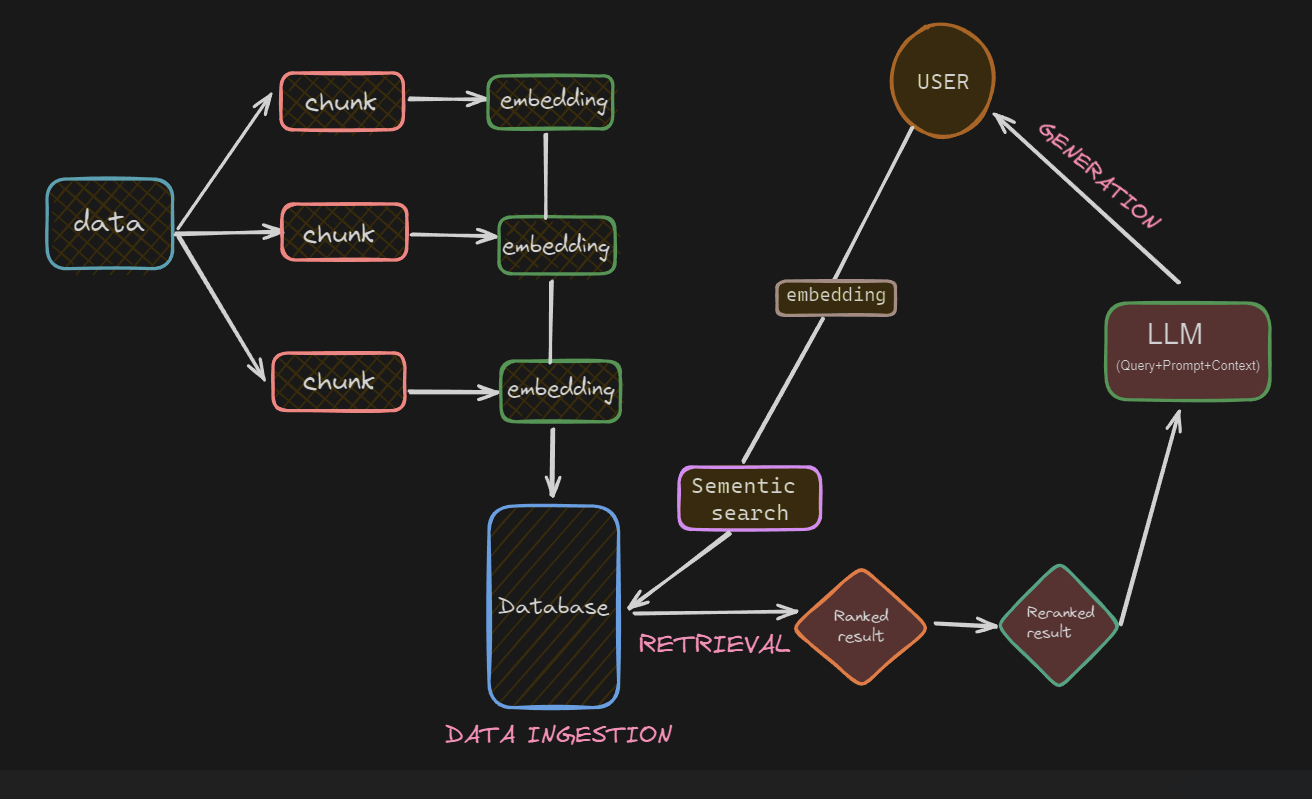

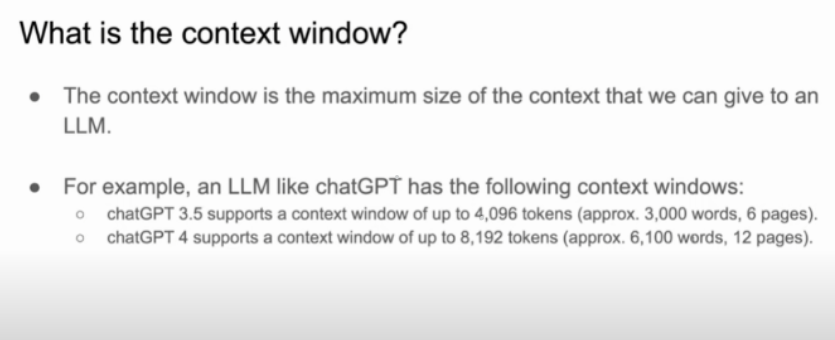

# RAG Having Three main Stages

1. Data Ingestion
2. Data Retrieval
3. Data Generation

In [6]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA

In [7]:
# Load document using PyPDFLoader document loader
loader = PyPDFLoader("/content/got.pdf")
documents = loader.load()

In [8]:
#Splitting the data into chunk
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
docs = text_splitter.split_documents(documents=documents)

# MTEB: Massive Text Embedding Benchmark

#### The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

BGE(BAAI general embedding)
BAAI: https://huggingface.co/BAAI

**Dataset size:**  Larger datasets generally benefit from more powerful models like MPNet.

**Computational resources:**  If you have limited resources, BGE Small En or MiniLM might be better options.

**Task complexity:**  For complex tasks like question answering or text summarization, MPNet is often preferred.

**Embedding dimensionality:**  Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

**Performance vs. efficiency trade-off:** Decide if you prioritize high accuracy or faster processing

#####Experimentation is key. Try different models and evaluate their performance on your specific task and dataset to find the best fit.

MPNET: Masked and Permuted Pre-training for Language Understanding.

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb


In [9]:
#loading the embedding model from huggingface
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Why Use FAISS

1. Efficiency
2. Versatility
3. Scalability
4. Integration
5. GPU Support

# Security Considerations

1. Data Control
2. Reduced Exposure
3. Compliance
4. Latency and Performance
5. Network Security

In [11]:
'''
from langchain.vectorstores import FAISS
vectorstore=FAISS.from_documents(text_chunks, embeddings)
retriever=vectorstore.as_retriever()
'''

'\nfrom langchain.vectorstores import FAISS\nvectorstore=FAISS.from_documents(text_chunks, embeddings)\nretriever=vectorstore.as_retriever()\n'

In [10]:
#loading the data and correspond embedding into the FAISS
vectorstore = FAISS.from_documents(docs, embeddings)

In [11]:
# Persist the vectors locally on disk
vectorstore.save_local("faiss_index_")

In [12]:
# Load from local storage
persisted_vectorstore = FAISS.load_local("faiss_index_", embeddings,allow_dangerous_deserialization=True)

In [13]:
#creating a retriever on top of database
retriever = persisted_vectorstore.as_retriever()

In [14]:
!pip install langchain_ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [15]:
#loading the llama3.1 model using Ollama
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 8.9 MB/s eta 0:00:00


curl -fsSL https://ollama.com/install.sh | sh

ollama serve & ollama pull llama3.1

In [16]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [29]:
from langchain_community.llms import Ollama

In [30]:
# Initialize an instance of the Ollama model
llm = Ollama(model="llama3.1")

In [31]:
# Invoke the model to generate responses
response = llm.invoke("Tell me a joke")
print(response)

Here's one:

What do you call a fake noodle?

An impasta!

Hope that made you laugh! Do you want to hear another one?


In [24]:
'''from langchain_ollama.llms import OllamaLLM
#loading the ollama model
model = OllamaLLM(model="llama3.1")'''

In [32]:
 #Use RetrievalQA chain for orchestration
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

In [35]:
while True:
  query = input("Type your query if you want to exit type Exit: \n")
  if query == "Exit":
    break
  result = qa.run(query)
  print(result)

Type your query if you want to exit type Exit: 
"Describe the relationship and dynamic between Will, Gared, and Ser Waymar Royce"


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


The relationship and dynamic between Will, Gared, and Ser Waymar Royce are complex and multi-faceted.

Initially, it's clear that Gared is wary of Ser Waymar Royce. The old man-at-arms seems to be intimidated by the knight's authority and fine clothes. When Royce demands a fire, Gared hesitates, his "hood shadowed his face, but Will could see the hard glitter in his eyes" suggesting that he's trying to assert some measure of control or resistance.

Will, on the other hand, seems to be caught between his loyalty to Gared and his duty to obey Ser Waymar Royce. He's acutely aware of the power dynamics at play and tries to navigate them with caution. When Will sees the abandoned campsite, he's hesitant to inform Royce, suggesting that he values his relationship with Gared over obedience to the knight.

Ser Waymar Royce, meanwhile, is portrayed as arrogant and dismissive of those around him. He seems to be more concerned with proving himself than with understanding the situation or listenin

In [ ]:
query1= "Describe the relationship and dynamic between Will, Gared, and Ser Waymar Royce"
query2= "How long have Gared and Will been part of the Night's Watch?"